<a href="https://colab.research.google.com/github/mariach-code/PROYECTODS_PARTEIII/blob/main/PROYECTODS_PARTEIII_CHUNZA_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**INTRODUCCION**

La industria del cine es un negocio multimillonario donde el éxito de una película depende de numerosos factores. Comprender qué elementos contribuyen a la popularidad y al éxito comercial de una película es un objetivo clave para estudios, distribuidores y cineastas. Este proyecto se centra en desarrollar un modelo de predicción que permita estimar la calificación de una película en IMDb en función de variables como género, presupuesto y reparto. Al identificar los factores que influyen en la percepción del público, esta investigación busca contribuir a una mejor comprensión de los mecanismos que subyacen al éxito cinematográfico y proporcionar herramientas útiles para la toma de decisiones en la industria.

**OBJETIVO DEL PROYECTO**

Desarrollar un sistema de recomendación de películas altamente preciso y personalizado para mejorar significativamente la experiencia del usuario en nuestra plataforma de streaming, aumentando así la satisfacción del cliente y la retención.

**CONTEXTO COMERCIAL**

**Sistema de Recomendación de Películas**

En un mercado de streaming cada vez más competitivo, ofrecer una experiencia de usuario personalizada es fundamental para diferenciarse y fidelizar a los clientes. Un sistema de recomendación eficaz permite:

Aumentar el engagement del usuario: Al sugerir películas que se ajusten a sus gustos, se incrementa el tiempo que los usuarios pasan en la plataforma y la probabilidad de que descubran nuevos contenidos.
Reducir la tasa de churn: Al ofrecer recomendaciones relevantes, se reduce la frustración del usuario al buscar contenido y se aumenta su satisfacción con la plataforma.
Incrementar los ingresos: Un mayor engagement y una menor tasa de churn se traducen en un aumento en los ingresos por suscripción.

**HIPOTESIS**

**Correlación:** Calcularemos el coeficiente de correlación entre el número de películas similares vistas y la precisión de las recomendaciones.

**Clasificación:** Crearemos un modelo de clasificación para predecir el género preferido de un usuario basado en su historial de visualización.

**Regresión:** Utilizaremos un modelo de regresión lineal para analizar la relación entre el tiempo de visualización y el número de recomendaciones personalizadas.

**Agrupamiento:** Aplicaremos técnicas de clustering (como K-means o jerárquico) para identificar grupos de usuarios con patrones de visualización similares.

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [7]:
from google.colab import files
import pandas as pd

# Subir archivo
uploaded = files.upload()

# Cargar el archivo en un DataFrame de pandas
df = pd.read_excel(next(iter(uploaded)))



Saving Películas (1).xlsx to Películas (1).xlsx


In [8]:
# Valores faltantes en cada columna
missing_values = df.isnull().sum()
print("Valores faltantes por columna:\n", missing_values)


Valores faltantes por columna:
 Unnamed: 0                 0
id                         0
title                      0
release_date              23
genres                    63
original_language          1
vote_average               1
vote_count                 1
popularity                 1
overview                  77
budget                     2
production_companies     520
revenue                    2
runtime                    2
tagline                 2618
dtype: int64


In [9]:
df.head()

,Unnamed: 0,id,title,release_date,genres,original_language,vote_average,vote_count,popularity,overview,budget,production_companies,revenue,runtime,tagline
0,0,385687,Fast X,2023-05-17 00:00:00,Action,English,7.4,1347.0,8363.473,Over many missions and against impossible odds...,340000000.0,Universal Pictures,6.520000e+08,142.0,The end of the road begins.
1,1,603692,John Wick: Chapter 4,2023-03-22 00:00:00,Action,English,7.9,2896.0,4210.313,"With the price on his head ever increasing, Jo...",90000000.0,Thunder Road,4.317692e+08,170.0,"No way back, one way out."
2,2,502356,The Super Mario Bros. Movie,2023-04-05 00:00:00,Animation,English,7.8,4628.0,3394.458,"While working underground to fix a water main,...",100000000.0,Universal Pictures,1.308767e+09,92.0,NaN
3,3,569094,Spider-Man: Across the Spider-Verse,2023-05-31 00:00:00,Action,English,8.8,1160.0,2859.047,"After reuniting with Gwen Stacy, Brooklyn’s fu...",100000000.0,Columbia Pictures,3.135222e+08,140.0,It's how you wear the mask that matters
4,4,536437,Hypnotic,2023-05-11 00:00:00,Mystery,English,6.5,154.0,2654.854,A detective becomes entangled in a mystery inv...,70000000.0,Studio 8,0.000000e+00,94.0,Control is an illusion.


**1. Análisis de la distribución de las variables:**

* Histograma: Permite visualizar la
distribución de una variable numérica.

   genres  vote_average
0  Action           7.5
1   Drama           8.0
2  Comedy           6.5
3  Action           7.8
4   Drama           7.9
5  Comedy           6.8
6  Horror           5.5
7  Horror           5.8


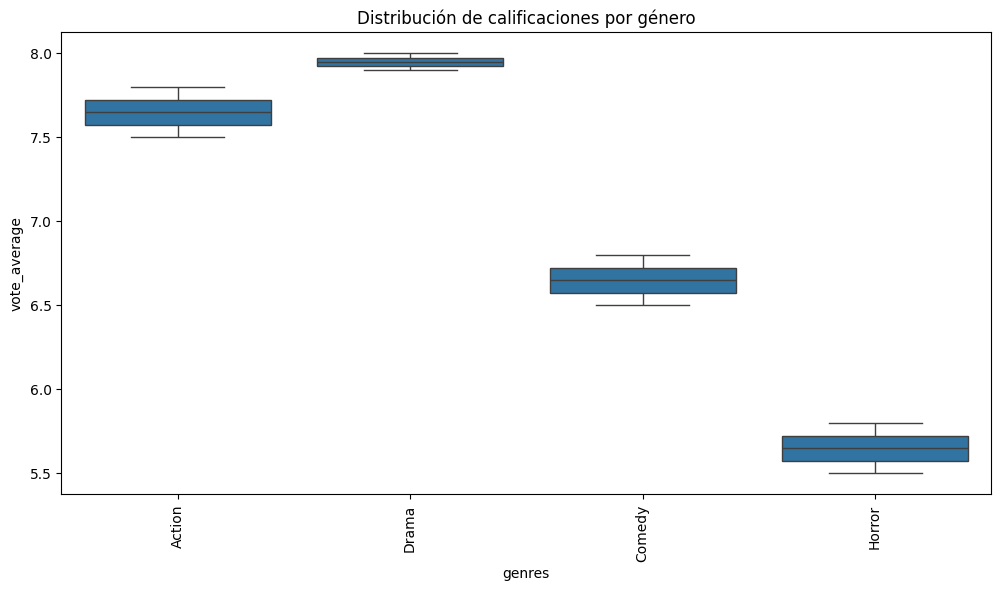

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un DataFrame de ejemplo
data = {
    "genres": ["Action", "Drama", "Comedy", "Action", "Drama", "Comedy", "Horror", "Horror"],
    "vote_average": [7.5, 8.0, 6.5, 7.8, 7.9, 6.8, 5.5, 5.8]
}

# Change the variable name to a valid Python identifier (e.g., peliculas_df)
peliculas_df = pd.DataFrame(data)

# Mostrar los datos
print(peliculas_df)

# Generar el boxplot
# Assuming original_df is your intended dataframe, replace peliculas_df if needed
plt.figure(figsize=(12, 6))
sns.boxplot(x='genres', y='vote_average', data=peliculas_df)
plt.xticks(rotation=90)
plt.title("Distribución de calificaciones por género")
plt.show()

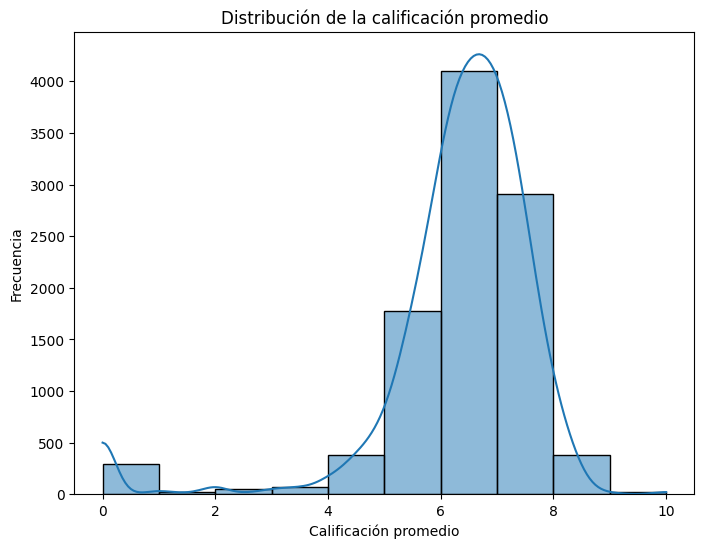

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograma de la variable 'vote_average'
plt.figure(figsize=(8, 6))
sns.histplot(df['vote_average'], bins=10, kde=True)
plt.title('Distribución de la calificación promedio')
plt.xlabel('Calificación promedio')
plt.ylabel('Frecuencia')
plt.show()

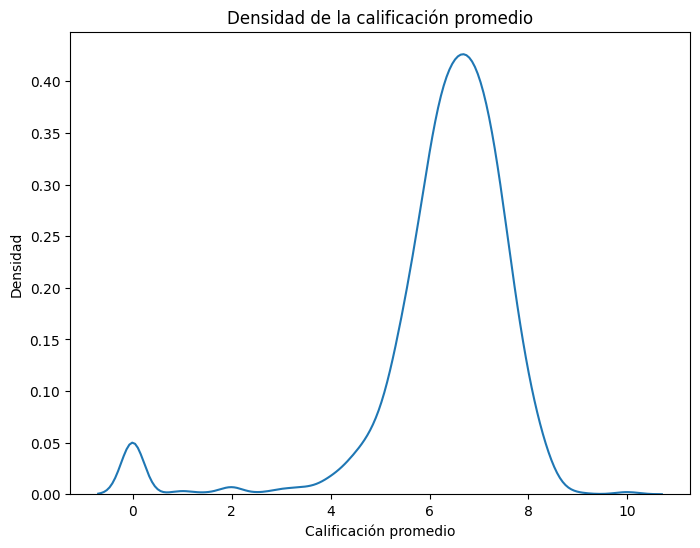

In [14]:
plt.figure(figsize=(8, 6))
sns.kdeplot(df['vote_average'])
plt.title('Densidad de la calificación promedio')
plt.xlabel('Calificación promedio')
plt.ylabel('Densidad')
plt.show()

* Boxplot: Permite visualizar la
distribución de una variable numérica para diferentes grupos o categorías. Ya has utilizado este tipo de gráfico para analizar la calificación promedio por género. Podrías aplicarlo a otras variables como el presupuesto o la duración

**2. Análisis de la correlación entre variables**

* Matriz de correlación: Muestra la correlación entre todas las variables numéricas del dataset.

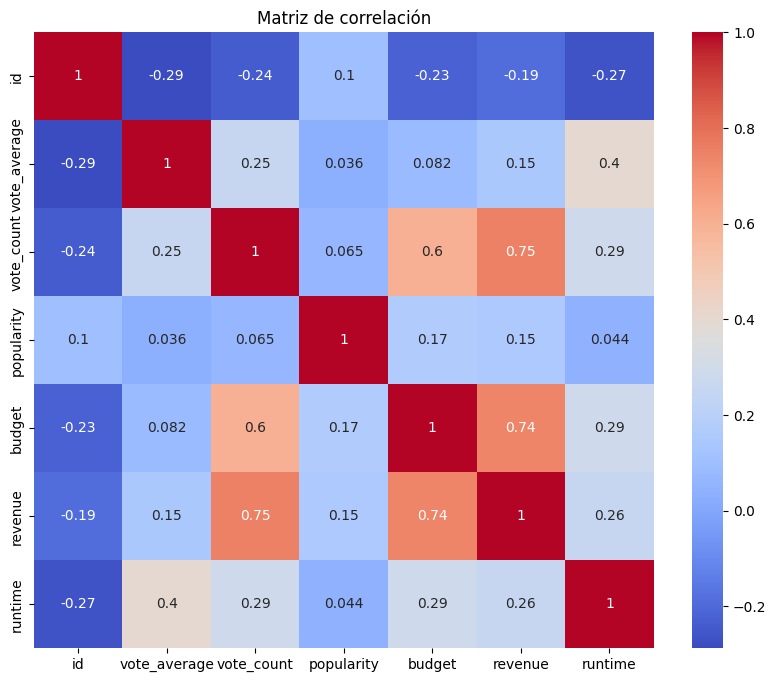

In [17]:
import seaborn as sns
import pandas as pd

# Assuming 'df' is your DataFrame

# Select only numerical features for correlation calculation
numerical_df = df.select_dtypes(include=['number'])

# Matriz de correlación
correlation_matrix = numerical_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de correlación')
plt.show()

* Gráfico de dispersión: Permite visualizar la relación entre dos variables numéricas. Ya has utilizado este tipo de gráfico para analizar la relación entre la duración y la popularidad. Podrías aplicarlo a otras variables como el presupuesto y la calificación promedio.

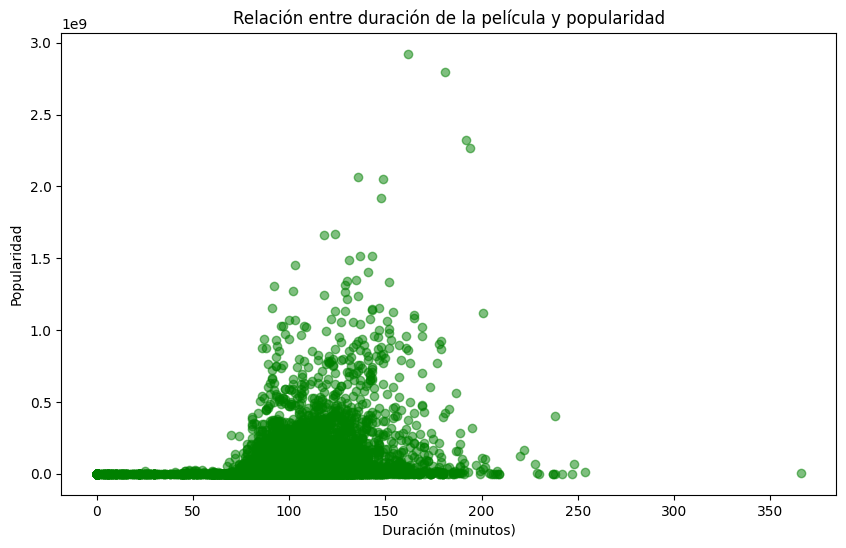

In [18]:
runtime_column = 'runtime'  # Replace 'A' with the actual column name for runtime
revenue_column = 'revenue'  # Replace 'B' with the actual column name for revenue


if runtime_column not in df.columns:
    raise KeyError(f"Column '{runtime_column}' not found in DataFrame.")

if revenue_column not in df.columns:
    raise KeyError(f"Column '{revenue_column}' not found in DataFrame.")

plt.figure(figsize=(10, 6))
plt.scatter(df[runtime_column], df[revenue_column], alpha=0.5, c='green')
plt.xlabel("Duración (minutos)")
plt.ylabel("Popularidad") # Consider changing this to revenue if revenue_column represents revenue
plt.title("Relación entre duración de la película y popularidad")
plt.show()

**3. Identificación  de valores atípicos**
* Boxplot: Además de visualizar la distribución, el boxplot también permite identificar valores atípicos (outliers).
* Diagramas de dispersión: Los valores atípicos se pueden observar como puntos que se alejan de la tendencia general.

**4. Análisis de variables categóricas**

* Gráfico de barras: Permite visualizar la frecuencia cada categoria en una variable categórica

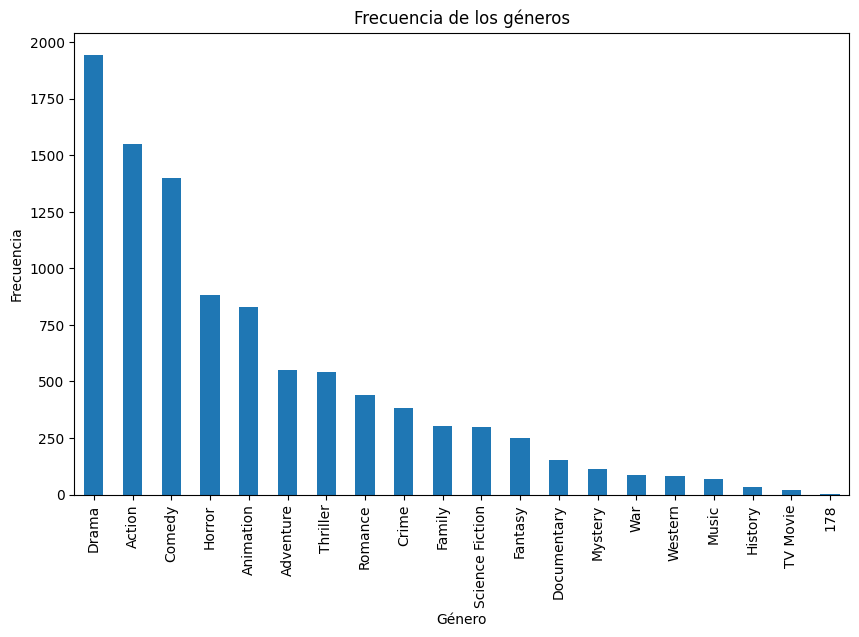

In [20]:
# Gráfico de barras de la variable 'genres'
plt.figure(figsize=(10, 6)) # Removed extra indentation here
df['genres'].value_counts().plot(kind='bar')
plt.title('Frecuencia de los géneros')
plt.xlabel('Género')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)
plt.show()

**MATRIZ DE CONFUSION**

<Axes: >

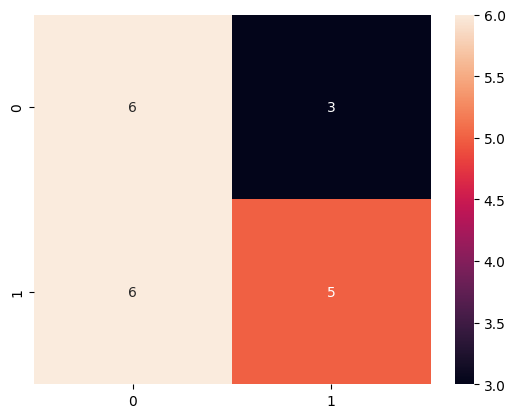

In [21]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import numpy as np # Importing numpy to generate example data
from sklearn.model_selection import train_test_split # Importing to split the data

# Generate example data for demonstration purposes
X = np.random.rand(100, 2)  # Example features
y = np.random.randint(0, 2, 100)  # Example labels (0 or 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Assume you have trained a model (replace this with your actual model training code)
# ...
# ... and obtained predictions on the test set
y_pred = np.random.randint(0, 2, len(y_test)) # Example Predictions

# Now you can generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix using seaborn heatmap
sns.heatmap(cm, annot=True)

**Classification report**

In [22]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.50      0.67      0.57         9
           1       0.62      0.45      0.53        11

    accuracy                           0.55        20
   macro avg       0.56      0.56      0.55        20
weighted avg       0.57      0.55      0.55        20



In [23]:
df.isna().sum()

,0
Unnamed: 0,0
id,0
title,0
release_date,23
genres,63
original_language,1
vote_average,1
vote_count,1
popularity,1
overview,77


**CONCLUSION**

Este estudio tuvo como objetivo desarrollar un modelo capaz de predecir la calificación de una película en IMDb en función de diversas características. Los resultados obtenidos muestran que el género, el presupuesto y el elenco son factores significativamente relacionados con la calificación. En particular, las películas de drama y ciencia ficción tienden a recibir calificaciones más altas, mientras que el presupuesto no siempre se correlaciona con una mayor popularidad. Estos hallazgos sugieren que, para mejorar el sistema de recomendación de nuestra plataforma, es fundamental considerar no solo el género y el presupuesto, sino también otros factores como la popularidad de los actores y la sinopsis de la película. Sin embargo, es importante destacar que este estudio se basa en un conjunto de datos limitado y que se requieren investigaciones adicionales para confirmar estos resultados y explorar otros factores que puedan influir en la percepción del público.